## 3차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.3 MB/s eta 0:00:00


1.2 라이브러리 설정

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import warnings
import string

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [ ]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [ ]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module='praw')

In [ ]:
posts = []
for post in top_posts:
    posts.append({
        'Title': post.title,          # 제목
        'Text': post.selftext         # 포스트 내용
    })

df = pd.DataFrame(posts)

df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

2.3.1 소문자 변환하기

In [ ]:
def to_lowercase(text):
    return text.lower()

df['Title'] = df['Title'].apply(to_lowercase)
df['Text'] = df['Text'].apply(to_lowercase)

df.head()

,Title,Text
0,a note to young investors (or new investors),as the fed caused a bit of a ripple in the mar...
1,to all of you who are red this year while the ...,lately i keep hearing the same old narrative f...
2,pelosi's husband buying over $1 million of com...,[full article](https://www.msn.com/en-us/tv/ne...
3,beware of what amc shorts are holding!,i understand that most people in this thread i...
4,blackberry -- a dormant giant,###**abbreviation index:**\n\nbb -- blackberry...


2.3.2 토큰화하기

In [ ]:
def tokenize(text):
    return word_tokenize(text)

df['Title'] = df['Title'].apply(tokenize)
df['Text'] = df['Text'].apply(tokenize)

df.head()

,Title,Text
0,"[a, note, to, young, investors, (, or, new, in...","[as, the, fed, caused, a, bit, of, a, ripple, ..."
1,"[to, all, of, you, who, are, red, this, year, ...","[lately, i, keep, hearing, the, same, old, nar..."
2,"[pelosi, 's, husband, buying, over, $, 1, mill...","[[, full, article, ], (, https, :, //www.msn.c..."
3,"[beware, of, what, amc, shorts, are, holding, !]","[i, understand, that, most, people, in, this, ..."
4,"[blackberry, --, a, dormant, giant]","[#, #, #, *, *, abbreviation, index, :, *, *, ..."


2.3.3 불용어 및 구두점 제거하기

In [ ]:
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def remove_stopwords_punctuation(tokens):
    return [word for word in tokens if word not in stop_words and word not in punctuations]

df['Title'] = df['Title'].apply(remove_stopwords_punctuation)
df['Text'] = df['Text'].apply(remove_stopwords_punctuation)

df.head()

,Title,Text
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, p500, 30]","[lately, keep, hearing, old, narrative, beat-d..."
2,"[pelosi, 's, husband, buying, 1, million, comp...","[full, article, https, //www.msn.com/en-us/tv/..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, --, dormant, giant]","[abbreviation, index, bb, --, blackberry, aws,..."


2.3.4 숫자 제거하기

In [ ]:
def remove_numbers(tokens):
    return [word for word in tokens if not word.isdigit()]

df['Title'] = df['Title'].apply(remove_numbers)
df['Text'] = df['Text'].apply(remove_numbers)

df.head()

,Title,Text
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, p500]","[lately, keep, hearing, old, narrative, beat-d..."
2,"[pelosi, 's, husband, buying, million, compute...","[full, article, https, //www.msn.com/en-us/tv/..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, --, dormant, giant]","[abbreviation, index, bb, --, blackberry, aws,..."


2.3.5 필요없는 문자 제거하기

In [ ]:
def remove_specific_char_tokens(tokens):
    return [token for token in tokens if token not in ['--', "'", "’", '"', "'s", '”', '“']]

df['Title'] = df['Title'].apply(remove_specific_char_tokens)
df['Text'] = df['Text'].apply(remove_specific_char_tokens)

df.head()

,Title,Text
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, p500]","[lately, keep, hearing, old, narrative, beat-d..."
2,"[pelosi, husband, buying, million, computer, c...","[full, article, https, //www.msn.com/en-us/tv/..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

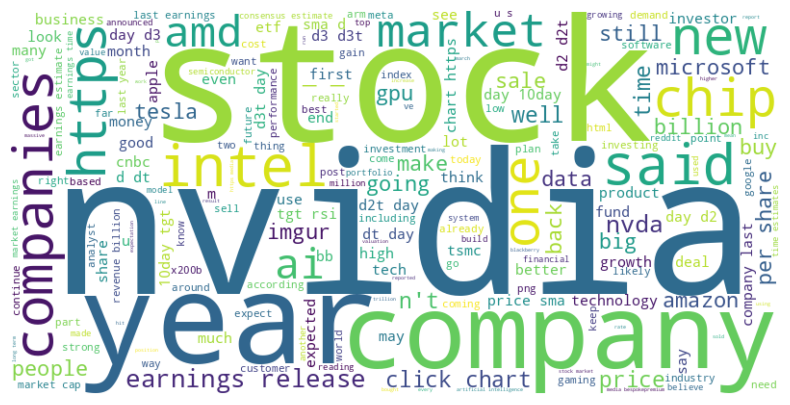

In [ ]:
df['combined'] = df['Title'].apply(lambda x: ' '.join(x)) + ' ' + df['Text'].apply(lambda x: ' '.join(x))

text_data = df['combined'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

<ipython-input-14-1d149472ee14>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_most_common, palette='Blues_d')


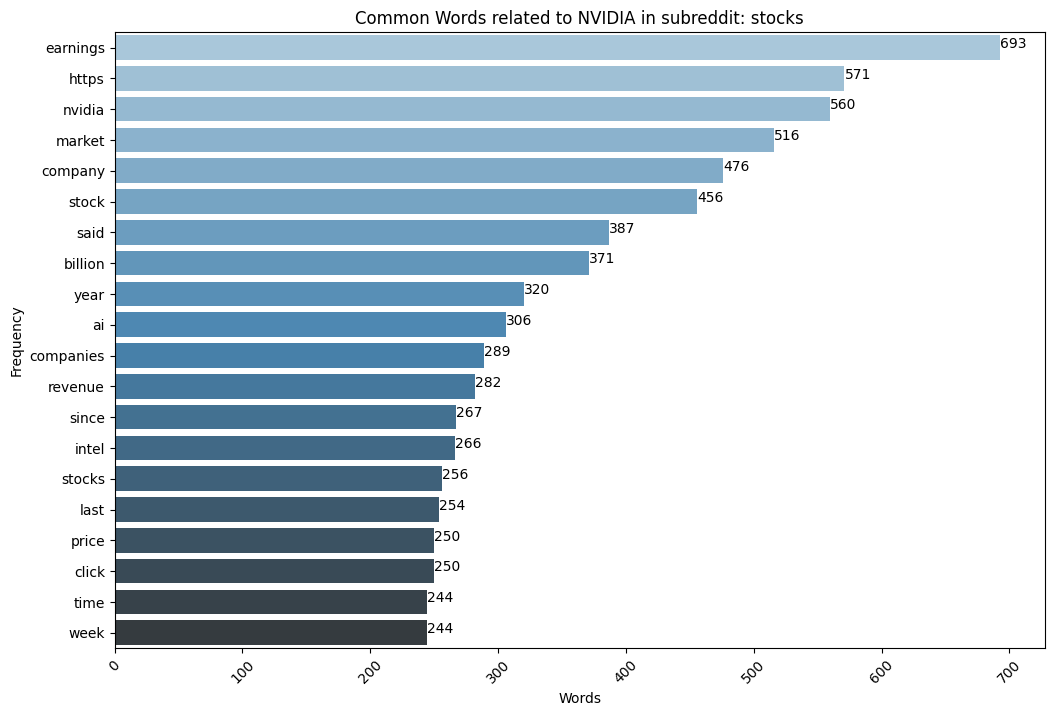

In [ ]:
text_tokens = text_data.split()

word_counts = Counter(text_tokens)

most_common_words = word_counts.most_common(20)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 8))

sns.barplot(x='count', y='word', data=df_most_common, palette='Blues_d')

for index, value in enumerate(df_most_common['count']):
    plt.text(value, index, str(value))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.xticks(rotation=45)
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

## 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

## 3.1 감성 분석

텍스트에서 감정적 내용을 분석하여 긍정, 부정, 중립 등의 감정 상태를 파악하는 방법

#### VADER 이용: 짧은 문장(예: 소셜 미디어 포스트)에 적합하며, 긍정, 부정, 중립적인 단어에 기반하여 감정을 분석합니다.

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['combined'].apply(get_sentiment)
print(df[['combined', 'sentiment']])

                                              combined sentiment
0    note young investors new investors fed caused ...  Positive
1    red year p500 lately keep hearing old narrativ...  Positive
2    pelosi husband buying million computer chip st...  Negative
3    beware amc shorts holding understand people th...  Positive
4    blackberry dormant giant abbreviation index bb...  Positive
..                                                 ...       ...
230  market recap today thursday november psychomar...  Positive
231  tsmc sales grow july strong ai chip demand blo...  Positive
232  meta still cheapest magnificent wrong quick gl...  Positive
233  made since started trading months ago credits ...  Positive
234  cnbc meta advertising growth proof hefty ai sp...  Positive

[235 rows x 2 columns]


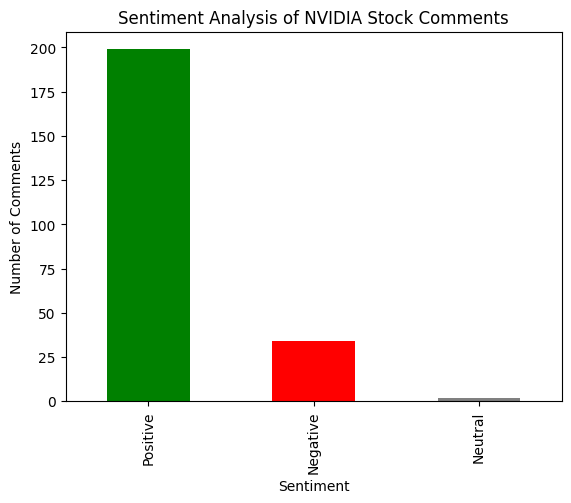

In [ ]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of NVIDIA Stock Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

#### 3.1.1 긍정적인 글에 대한 워드 클라우드

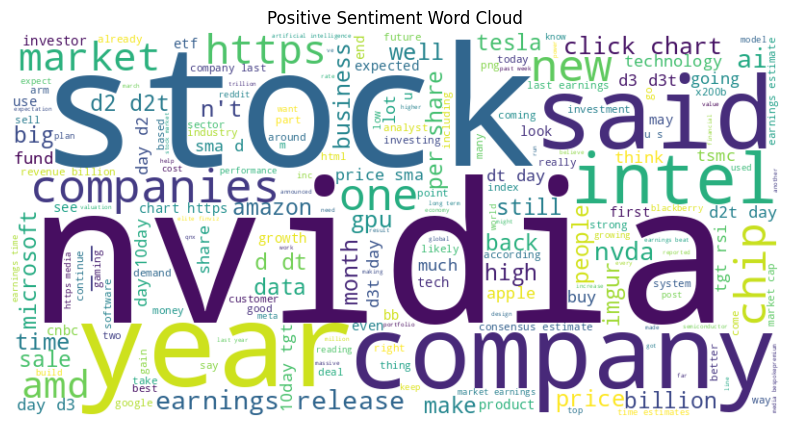

In [ ]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['combined'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

In [ ]:
first_positive_text = df[df['sentiment'] == 'Positive']['combined'].iloc[0]
print("First Positive Text:\n", first_positive_text)

First Positive Text:
 note young investors new investors fed caused bit ripple market today considered vacating position ultimately n't thought little bit journey years thought 'd share story things 've learned back made first move stock market taking tax return buying shares coal company called consol time traded symbol cnx bought almost dd simply paid pretty good dividend around .50/share recall correctly back internet trading really n't thing bought bank trade cost actually call broker bank place trade phone ancient times right lol figured win lose draw eventually stock pay dividend n't follow market much really holding dividend realized couple years later climbed 30s around hit decided sell still bank trade cost another forty bucks took money put basic savings account basically sat nothing missed crash liquid time pure luck nobody saw coming reading decided confidence trading took money opened investor checking/trading account charles schwab amazed trades costing 4.99 done laptop l

In [ ]:
positive_text

"note young investors new investors fed caused bit ripple market today considered vacating position ultimately n't thought little bit journey years thought 'd share story things 've learned back made first move stock market taking tax return buying shares coal company called consol time traded symbol cnx bought almost dd simply paid pretty good dividend around .50/share recall correctly back internet trading really n't thing bought bank trade cost actually call broker bank place trade phone ancient times right lol figured win lose draw eventually stock pay dividend n't follow market much really holding dividend realized couple years later climbed 30s around hit decided sell still bank trade cost another forty bucks took money put basic savings account basically sat nothing missed crash liquid time pure luck nobody saw coming reading decided confidence trading took money opened investor checking/trading account charles schwab amazed trades costing 4.99 done laptop lol quite bit dd decid

이 투자자는 처음 주식 시장에 투자할 때 세금 환급금을 사용하여 Consol이라는 석탄 회사의 주식을 매수했으며, 당시 주가는 약 $0.50 주였다고 합니다. 그 당시에는 인터넷 거래가 흔하지 않아 은행에서 전화로 거래를 진행해야 했으며, 한 거래당 비용이 들었다고 합니다. 그 후 주식 가격이 $30대까지 상승했을 때 주식을 매도했고, 매도한 자금을 저축 계좌에 넣어 두었지만 결국 큰 수익은 내지 못했다고 설명합니다.

이후, 차츰 주식 시장에서 자신감을 키운 후 Charles Schwab 계좌를 열었고, 당시 거래당 $4.99였던 수수료에 감탄하며 Nvidia 주식을 주당 약 $50에 매수했다고 합니다. 그 나머지 돈은 자동차 대금을 지불하는 데 사용했으며, 투자한 Nvidia 주식은 '다이아몬드 핸드' 정신으로 장기간 보유했다고 언급합니다.

이후로 여러 주식을 사고팔며 20만 달러 가치의 안전 자산을 쌓았고, 초기의 세금 환급금을 투자해 큰 수익을 거두었다고 설명합니다. 중요한 교훈 중 하나로는 "절대 감정에 휘둘리지 말고, 계획을 가지고 투자해야 한다"는 것입니다. 시장이 하락할 때 공황 매도를 하지 말고, 꾸준히 보유해야 한다고 강조합니다.

특히 2007-2016년 동안 전통적인 저축 계좌에 돈을 방치한 것에 대한 후회도 언급하면서, 이 기간 동안 더 나은 재정 상품에 투자했더라면 훨씬 더 높은 이자율을 얻을 수 있었다고 합니다.

마지막으로, Consol 주식을 매도한 경험을 반성하며, 비록 이후 주식 가격이 $90까지 상승해 아쉬움이 남긴 했지만, 그때의 판단이 나쁘지 않았다고 설명합니다. 그리고 "주식 시장에 늦게 진입하더라도 큰 수익을 낼 수 있으니 절대 늦었다고 생각하지 말라"는 교훈을 전달합니다.



In [ ]:
vader_lexicon = analyzer.lexicon

positive_words = {word for word, score in vader_lexicon.items() if score > 0.05}

def get_sentiment_words(text, sentiment_words):
    words = text.lower().split()
    return [word for word in words if word in sentiment_words]

df['positive_words'] = df['combined'].apply(lambda x: get_sentiment_words(x, positive_words))

# 긍정적 단어 출력
print("Positive Words in Texts:")
print(df[['positive_words']])

Positive Words in Texts:
                                        positive_words
0    [share, shares, pretty, good, lol, win, luck, ...
1    [like, true, well, gains, energy, value, defen...
2    [shares, shares, benefit, joked, giving, trust...
3    [safely, play, like, recommend, top, value, tr...
4    [amazon, intelligent, amazon, intelligent, sha...
..                                                 ...
230  [strength, like, amazon, straight, amazon, gre...
231  [strong, growth, hopes, strong, intelligence, ...
232  [magnificent, good, good, profit, good, attrac...
233  [credits, gain, confident, shares, gains, glad...
234  [growth, pretty, important, significant, clear...

[235 rows x 1 columns]


3.1.2 부정적인 글에 대한 워드 클라우드

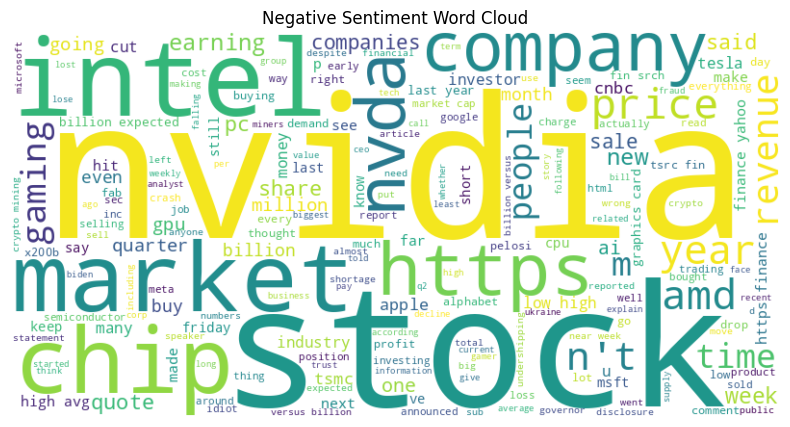

In [ ]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['combined'])

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

In [ ]:
first_negative_text = df[df['sentiment'] == 'Negative']['combined'].iloc[0]
print("First Negative Text:\n", first_negative_text)

First Negative Text:
 pelosi husband buying million computer chip stock ahead vote full article https //www.msn.com/en-us/tv/news/cnn-msnbc-abc-cbs-nbc-ignore-pelosis-husband-buying-over-dollar1-million-of-computer-chip-stock-ahead-of-vote/ar-aazkfkr li=bbnb7kz paul pelosi house speaker nancy pelosi husband made stock purchase million computer chip company weeks potential vote congress would give massive subsidy industry mr. pelosi made purchase million million shares nvidia https //www.foxbusiness.com/category/stocks semiconductor company according disclosure filing made speaker pelosi office exercised call options 20,000 shares disclosure states disclosure raised eyebrows reuters reported senate could vote bill contains billions dollars subsidies within semiconductor industry early tuesday curtis houck managing editor right-leaning media watchdog newsbusters said `` accident liberal media made decision ignore '' story could damage pelosi `` aware zero comprehension and/or shame reali

In [ ]:
negative_text

"pelosi husband buying million computer chip stock ahead vote full article https //www.msn.com/en-us/tv/news/cnn-msnbc-abc-cbs-nbc-ignore-pelosis-husband-buying-over-dollar1-million-of-computer-chip-stock-ahead-of-vote/ar-aazkfkr li=bbnb7kz paul pelosi house speaker nancy pelosi husband made stock purchase million computer chip company weeks potential vote congress would give massive subsidy industry mr. pelosi made purchase million million shares nvidia https //www.foxbusiness.com/category/stocks semiconductor company according disclosure filing made speaker pelosi office exercised call options 20,000 shares disclosure states disclosure raised eyebrows reuters reported senate could vote bill contains billions dollars subsidies within semiconductor industry early tuesday curtis houck managing editor right-leaning media watchdog newsbusters said `` accident liberal media made decision ignore '' story could damage pelosi `` aware zero comprehension and/or shame realize quintessential sto

폴 펠로시의 주식 구매가 반도체 보조금 법안 투표 직전에 이루어졌기 때문에, 이 거래가 내부자 거래일 수 있다는 의혹이 제기되었습니다. 그러나 낸시 펠로시 사무실은 그녀가 이러한 거래에 관여하지 않았으며, 필요한 모든 정보를 투명하게 공개했다고 주장했습니다. 이 사건은 내부자 거래 및 고위층의 경제적 특권에 대한 논란을 불러일으켰습니다.

In [ ]:
vader_lexicon = analyzer.lexicon

negative_words = {word for word, score in vader_lexicon.items() if score < -0.05}

def get_sentiment_words(text, sentiment_words):
    words = text.lower().split()
    return [word for word in words if word in sentiment_words]

df['negative_words'] = df['combined'].apply(lambda x: get_sentiment_words(x, negative_words))

# 부정적 단어 출력
print("\nNegative Words in Texts:")
print(df[['negative_words']])


Negative Words in Texts:
                                        negative_words
0    [lose, pay, missed, crash, risky, regrets, mis...
1          [bad, hiding, smh, bad, losers, stop, poor]
2    [accident, ignore, damage, shame, fire, suspec...
3                          [risk, risky, weary, crash]
4    [manipulation, affected, risk, stopping, hurti...
..                                                 ...
230  [demand, disruptions, bad, unemployment, low, ...
231  [demand, demand, demand, lows, limited, delay,...
232                    [wrong, crazy, gross, excluded]
233         [panic, threat, regret, stupid, seriously]
234            [skeptical, pay, questioned, lose, low]

[235 rows x 1 columns]


####TextBlob 이용: 더 일반적인 감정 분석 툴로, 긴 텍스트 분석에도 적합하며, polarity와 subjectivity 점수를 제공합니다.

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['combined'].apply(get_sentiment)

print(df[['combined', 'sentiment']])

                                              combined  sentiment
0    note young investors new investors fed caused ...   0.129244
1    red year p500 lately keep hearing old narrativ...  -0.015286
2    pelosi husband buying million computer chip st...   0.060417
3    beware amc shorts holding understand people th...   0.119935
4    blackberry dormant giant abbreviation index bb...   0.135790
..                                                 ...        ...
230  market recap today thursday november psychomar...   0.038147
231  tsmc sales grow july strong ai chip demand blo...   0.115745
232  meta still cheapest magnificent wrong quick gl...   0.264649
233  made since started trading months ago credits ...   0.079293
234  cnbc meta advertising growth proof hefty ai sp...   0.110106

[235 rows x 2 columns]


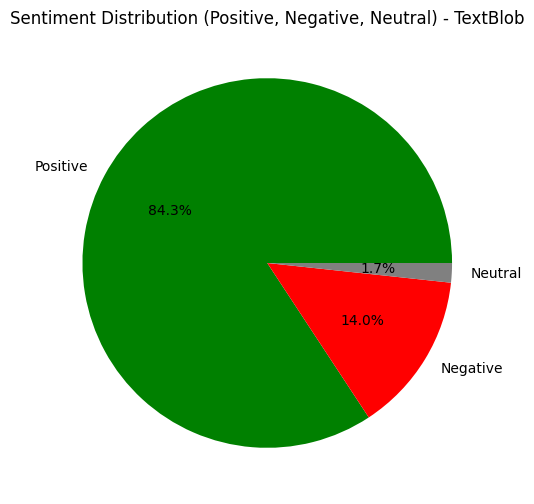

In [ ]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution (Positive, Negative, Neutral) - TextBlob')
plt.show()

## 3.2 n-gram 분석

연속된 n개의 단어가 함께 나타나는 빈도를 분석하는 방법(특정 패턴이나 연속된 단어의 관계를 이해하는 데 매우 유용)



3.2.1   2-gram - 바이그램(2-그램)은 두 단어가 함께 등장하는 빈도 측정

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter

In [ ]:
all_tokens = df['Title'].sum() + df['Text'].sum()

bigrams = list(ngrams(all_tokens, 2))

bigram_counts = Counter(bigrams)

# 상위 20개의 빈도가 높은 바이그램 출력
print("Top 20 Bigrams:")
for bigram, freq in bigram_counts.most_common(20):
    print(f'{bigram}: {freq}')

Top 20 Bigrams:
('earnings', 'release'): 158
('click', 'chart'): 144
('per', 'share'): 113
('/day', 'd2/d2t'): 100
('/day\\^2', 'd3/d3t'): 100
('/day\\^3', '10day'): 100
('10day', 'tgt'): 100
('chart', 'https'): 93
('since', 'company'): 80
('company', 'last'): 79
('last', 'earnings'): 77
('earnings', 'time'): 57
('time', 'estimates'): 57
('market', 'cap'): 54
('last', 'year'): 51
('consensus', 'estimates'): 51
('artificial', 'intelligence'): 50
('earnings', 'beat'): 45
('past', 'week'): 45
('close', 'click'): 45


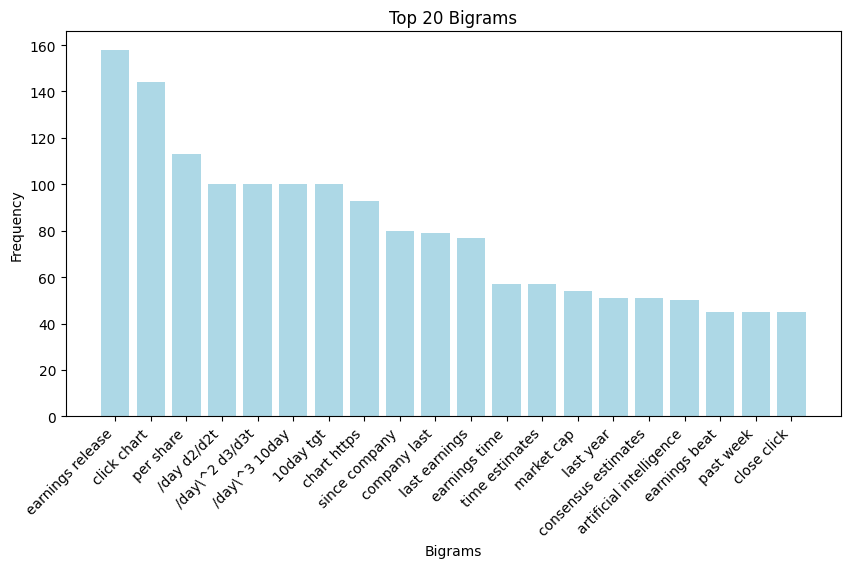

In [ ]:
top_bigrams = bigram_counts.most_common(20)

bigram_labels = [' '.join(bigram) for bigram, freq in top_bigrams]
bigram_values = [freq for bigram, freq in top_bigrams]

plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_values, color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

('earnings', 'release'): 기업의 실적 발표와 관련된 용어

('click', 'chart'),('chart', 'https'): 웹페이지나 온라인 보고서에서 주식 차트를 클릭

('per', 'share'): 주당 가치(예: 주당 순이익, 주당 가격)와 관련된 용어

('/day', 'd2/d2t'), ('/day\\^2', 'd3/d3t'), ('/day\\^3', '10day'), ('10day', 'tgt'): 주식이나 금융 관련 전문적인 지표를 나타내는 표현

('since', 'company'), ('company', 'last'), ('last', 'earnings'): 기업의 과거 실적이나 성과에 대한 언급

('earnings', 'time'), ('time', 'estimates'): 기업의 실적 발표 시기(earning time)

('market', 'cap'): 시가총액(Market Capitalization)의 약자

('last', 'year'): 과거의 성과나 실적을 언급

('consensus', 'estimates'): 애널리스트들이 제공한 기업 실적에 대한 평균 예측

('artificial', 'intelligence'): 인공지능(AI)

('earnings', 'beat'): 기업이 애널리스트들의 실적 예상치를 초과한 성과를 낸 경우

('past', 'week'): 최근 주가 변동 또는 과거 일주일간의 성과

('close', 'click'): 웹사이트 상의 주식 차트 또는 정보 창을 닫는 동작